In [1]:
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diccionario_meses={1:'enero',2:'febrero',3:'marzo', 4:'abril', 5:'mayo',6:'junio', 7:'julio', 8:'agosto', 9:'septiembre', 10:'octubre', 11:'noviembre', 12:'diciembre'}

In [3]:
file_path = path.join('..', 'data', 'masked','new_achs_accidents_data.csv')

classified_occupations = pd.read_csv('gpt_results.csv', names=['index', 'ocupacion', 'clasificacion-oit'], on_bad_lines='skip', header=0)
new_achs_accidents_data = pd.read_csv(file_path)
merged_occupations = pd.merge(new_achs_accidents_data, classified_occupations, on='ocupacion', how='inner')
merged_occupations.head()

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion,index,clasificacion-oit
0,7242107,2,1007001523,FRACTURA 5TO MTC DERECHO,QUILICURA,supervisor,29.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINO A MI TR...,12.1,2022-01-03,1,12
1,7253073,1,1000885489,\n27.01.2022 14:00 EVALUACION CONTROL TERAPIA ...,BUIN,supervisor,63.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA DANDO LA PAUTA...,12.1,2022-01-12,1,12
2,7353589,2,1000577480,- Ley\n- Acoge siniestro \n- STP\n- Medicament...,MAIPU,supervisor,69.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINANDO HACI...,12.1,2022-04-13,1,12
3,7382653,1,1003743753,-Acoge ley\n-Alta inmediata\n-Agendar hora en ...,SANTIAGO,supervisor,29.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA SUPERVISANO A ...,91.2,2022-05-11,1,12
4,7411613,1,1003466800,\nEP EN ESTUDIO \nALTA INMEDIATA \nMELOXICAM 1...,SANTIAGO,supervisor,31.0,masculino,"dolor, hormigueos, tiron muscular",54.2,2022-06-07,1,12


In [6]:
merged_occupations['fecha_creacion']= pd.to_datetime(merged_occupations['fecha_creacion'])

In [9]:
df_colum_year= merged_occupations.copy()
df_colum_year['year']= merged_occupations['fecha_creacion'].dt.year
df_colum_year['year']=df_colum_year['year'].astype(str)
df_colum_year['day_number']= merged_occupations['fecha_creacion'].dt.day_of_year
df_colum_year['month']= merged_occupations['fecha_creacion'].dt.month
df_colum_year['day_of_week'] = df_colum_year['fecha_creacion'].dt.day_name()
df_colum_year['year'].describe()

count     109194
unique         2
top         2023
freq       54622
Name: year, dtype: object

In [10]:
df_colum_year['month'].dtype

dtype('int32')

In [11]:
df_colum_year['month_name']=df_colum_year.apply(lambda row: diccionario_meses[row['month']], axis=1)

# Mecanismos

In [ ]:
file_path = path.join('..', 'data', 'masked','dicc_mecanismo_new_refined2.2.csv')
df_dicc = pd.read_csv(file_path, sep=';')

df_dicc.head()
df_dicc= df_dicc.rename(columns={"Codigo SUSESO 2018": "mecanismo"})
df_mecanismos = pd.merge(df, df_dicc, on= 'mecanismo')
df_mecanismos_time = pd.merge(df_colum_year,df_dicc, on='mecanismo')

## General

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1297761086.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(1, 0, 'INTOXICACION ALIMENTARIA'),
 Text(2, 0, 'FUERZA EXCESIVA'),
 Text(3, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(4, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(5, 0, 'PICADURAS DE INSECTOS'),
 Text(6, 0, 'AGRESIONES DE ANIMALES'),
 Text(7, 0, 'PROYECCION DE PARTICULAS'),
 Text(8, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(9, 0, 'PISADAS'),
 Text(10, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(11, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(12, 0, 'ATRAPAMIENTOS'),
 Text(13, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(14, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(15, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(16, 0, 'GOLPES'),
 Text(17, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(18, 0, 'CAIDAS')]

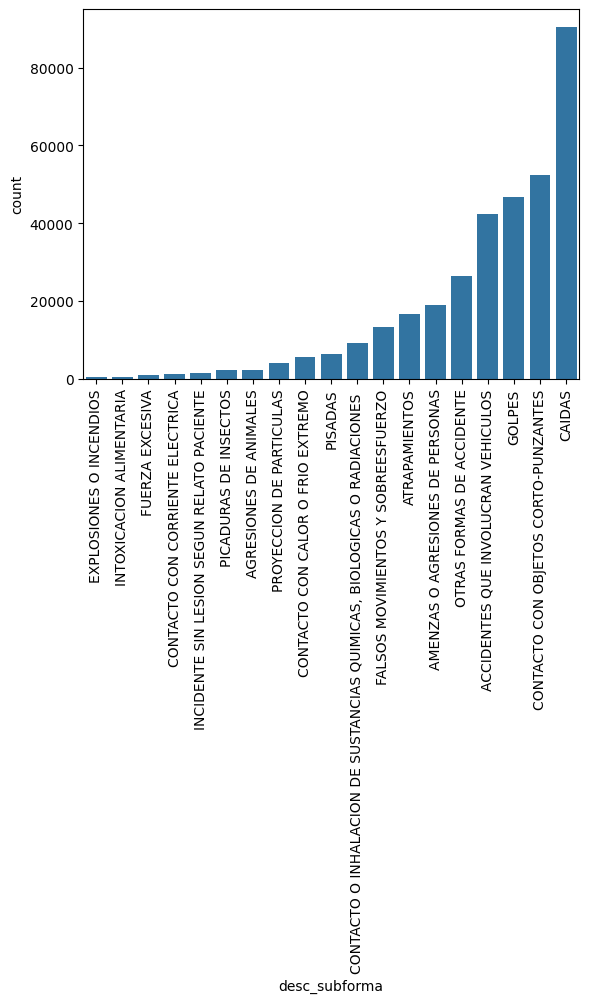

In [ ]:

graf_2 = df_mecanismos.groupby(['desc_subforma']).size().reset_index(name='count').sort_values('count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
fig = ax.get_figure()
fig.savefig("mecanismo_subforma.png", orientation="landscape") 

Separado por genero

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\638031250.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'CAIDAS'),
 Text(1, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(2, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(3, 0, 'PICADURAS DE INSECTOS'),
 Text(4, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(5, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(6, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(7, 0, 'GOLPES'),
 Text(8, 0, 'FUERZA EXCESIVA'),
 Text(9, 0, 'ATRAPAMIENTOS'),
 Text(10, 0, 'PISADAS'),
 Text(11, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(12, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(13, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(14, 0, 'PROYECCION DE PARTICULAS'),
 Text(15, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(16, 0, 'AGRESIONES DE ANIMALES'),
 Text(17, 0, 'INTOXICACION ALIMENTARIA'),
 Text(18, 0, 'EXPLOSIONES O INCENDIOS')]

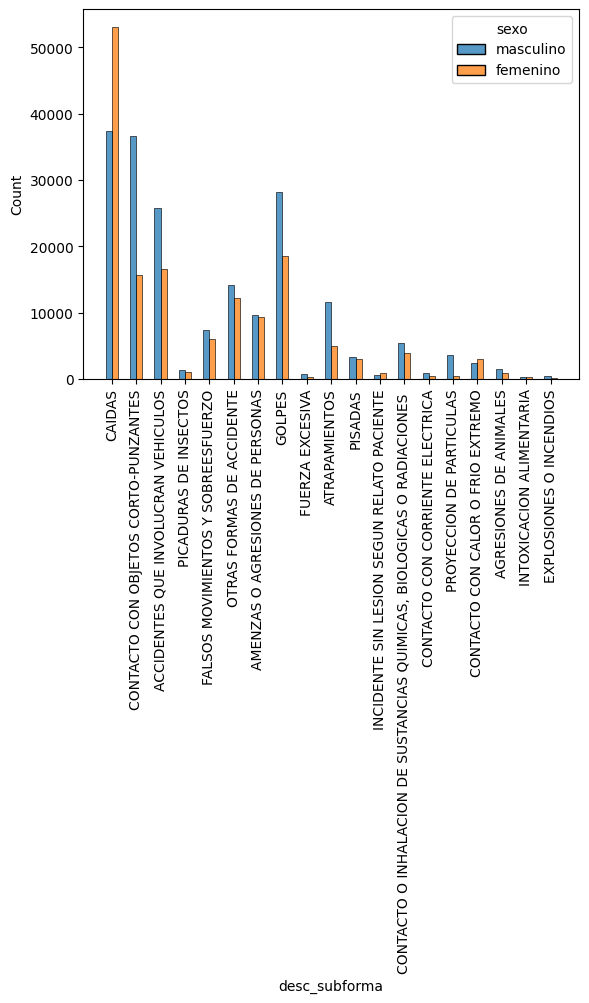

In [ ]:
ax= sns.histplot(data=df_mecanismos, x= 'desc_subforma', hue="sexo", shrink = 0.5, multiple="dodge")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## ¿Cuando ocurren?

### Caidas

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1479272930.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'febrero'),
 Text(1, 0, 'enero'),
 Text(2, 0, 'abril'),
 Text(3, 0, 'septiembre'),
 Text(4, 0, 'mayo'),
 Text(5, 0, 'junio'),
 Text(6, 0, 'julio'),
 Text(7, 0, 'octubre'),
 Text(8, 0, 'marzo'),
 Text(9, 0, 'diciembre')]

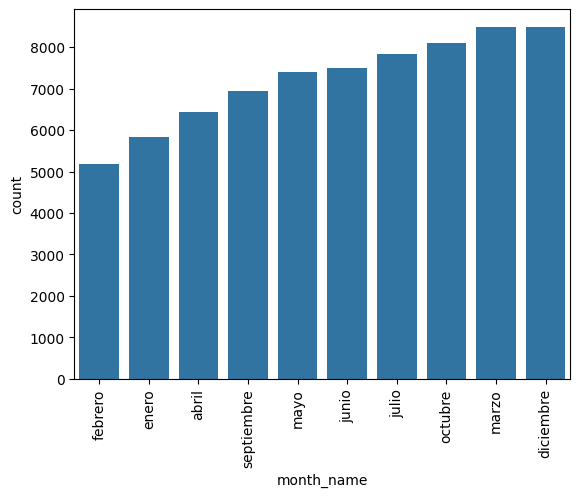

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['month_name']).size().reset_index(name='count').sort_values('count').head(10)
ax= sns.barplot(y='count', x='month_name', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\3687308080.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'febrero'),
 Text(1, 0, 'abril'),
 Text(2, 0, 'enero'),
 Text(3, 0, 'septiembre'),
 Text(4, 0, 'mayo'),
 Text(5, 0, 'junio'),
 Text(6, 0, 'octubre'),
 Text(7, 0, 'marzo'),
 Text(8, 0, 'diciembre'),
 Text(9, 0, 'julio'),
 Text(10, 0, 'agosto'),
 Text(11, 0, 'noviembre')]

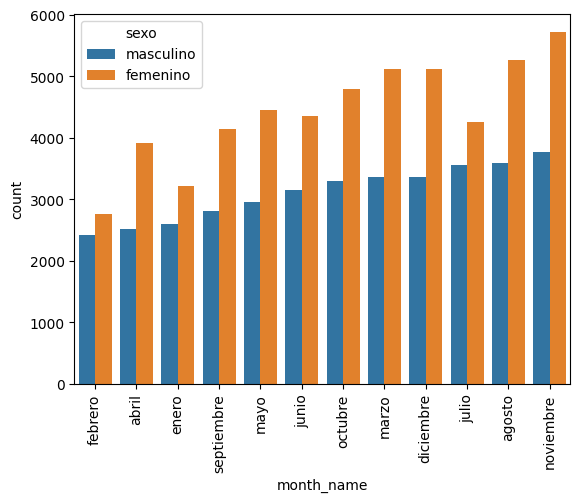

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['month_name','sexo']).size().reset_index(name='count').sort_values('count')


ax= sns.barplot(y='count', x='month_name', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1312665824.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'febrero'),
 Text(1, 0, 'abril'),
 Text(2, 0, 'septiembre'),
 Text(3, 0, 'enero'),
 Text(4, 0, 'octubre'),
 Text(5, 0, 'junio'),
 Text(6, 0, 'diciembre'),
 Text(7, 0, 'agosto'),
 Text(8, 0, 'julio'),
 Text(9, 0, 'mayo'),
 Text(10, 0, 'marzo'),
 Text(11, 0, 'noviembre')]

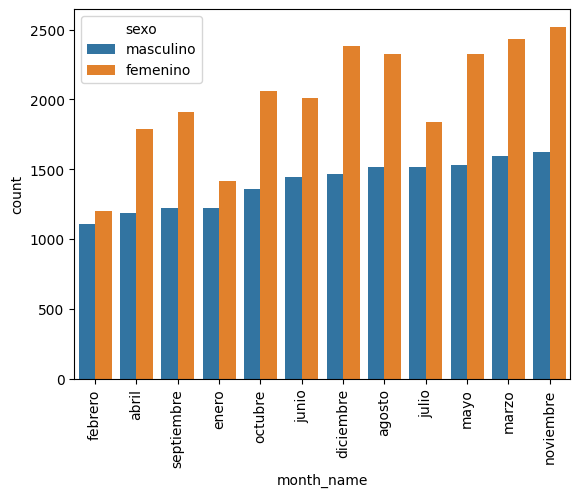

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS') & (df_mecanismos_time['year']=='2022') ].groupby(['month_name','sexo']).size().reset_index(name='count').sort_values('count')


ax= sns.barplot(y='count', x='month_name', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1955362822.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'febrero'),
 Text(1, 0, 'abril'),
 Text(2, 0, 'enero'),
 Text(3, 0, 'mayo'),
 Text(4, 0, 'septiembre'),
 Text(5, 0, 'junio'),
 Text(6, 0, 'marzo'),
 Text(7, 0, 'diciembre'),
 Text(8, 0, 'octubre'),
 Text(9, 0, 'julio'),
 Text(10, 0, 'agosto'),
 Text(11, 0, 'noviembre')]

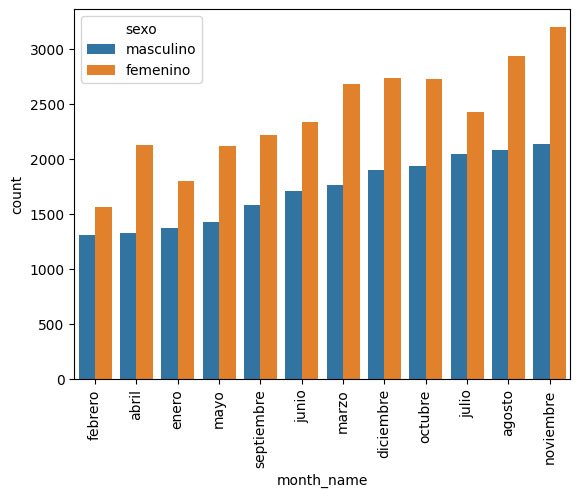

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS') & (df_mecanismos_time['year']=='2023') ].groupby(['month_name','sexo']).size().reset_index(name='count').sort_values('count')


ax= sns.barplot(y='count', x='month_name', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1248346637.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

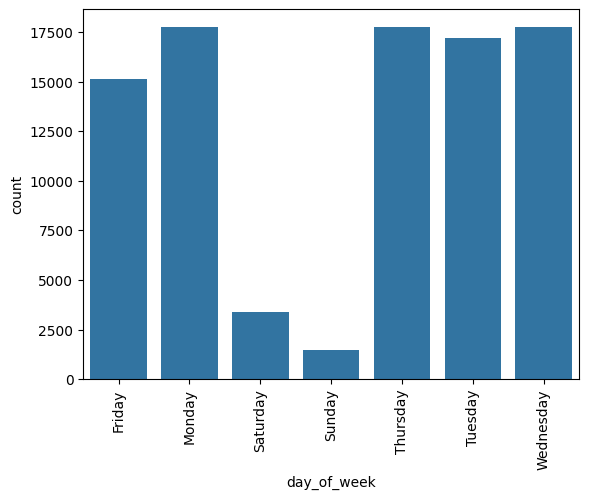

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['day_of_week']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\2858787676.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

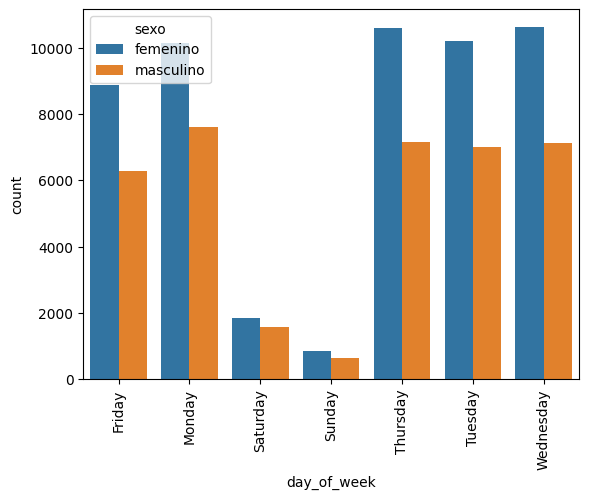

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['day_of_week','sexo']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1801504537.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

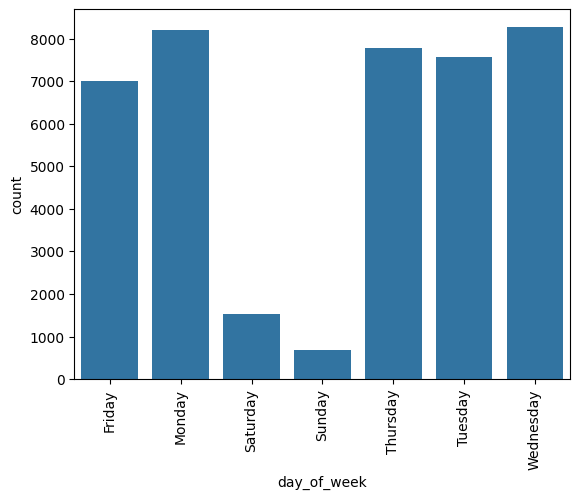

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS') & (df_mecanismos_time['year']=='2022') ].groupby(['day_of_week']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\451443130.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

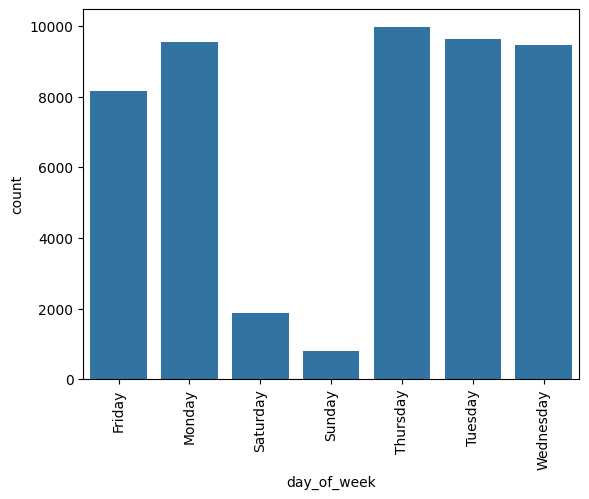

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS') & (df_mecanismos_time['year']=='2023') ].groupby(['day_of_week']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\3017320853.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

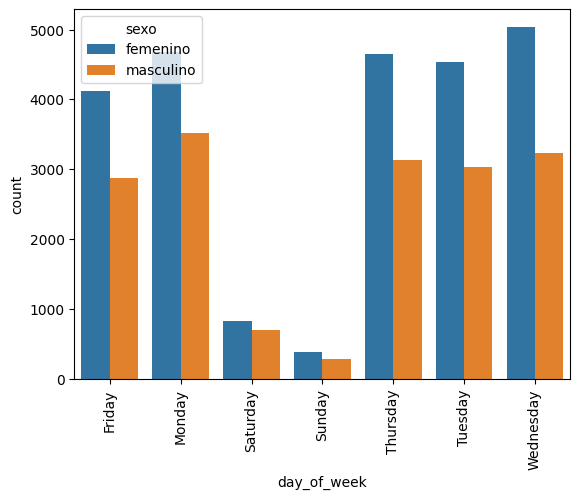

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS')& (df_mecanismos_time['year']=='2022')].groupby(['day_of_week','sexo']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\595044915.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

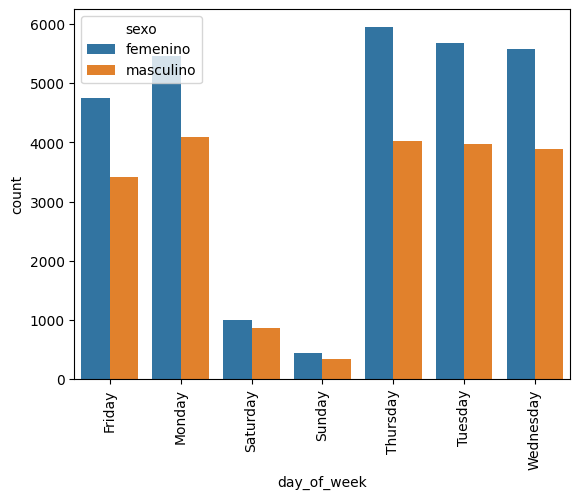

In [ ]:
graf_2 = df_mecanismos_time[(df_mecanismos_time['desc_subforma']=='CAIDAS')& (df_mecanismos_time['year']=='2023')].groupby(['day_of_week','sexo']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## ¿Que accidentes ocurrieron en los meses con mas accidentes?

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\919181117.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(1, 0, 'AGRESIONES DE ANIMALES'),
 Text(2, 0, 'FUERZA EXCESIVA'),
 Text(3, 0, 'INTOXICACION ALIMENTARIA'),
 Text(4, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(5, 0, 'PROYECCION DE PARTICULAS'),
 Text(6, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(7, 0, 'PICADURAS DE INSECTOS'),
 Text(8, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(9, 0, 'PISADAS'),
 Text(10, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(11, 0, 'ATRAPAMIENTOS'),
 Text(12, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(13, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(14, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(15, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(16, 0, 'GOLPES'),
 Text(17, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(18, 0, 'CAIDAS')]

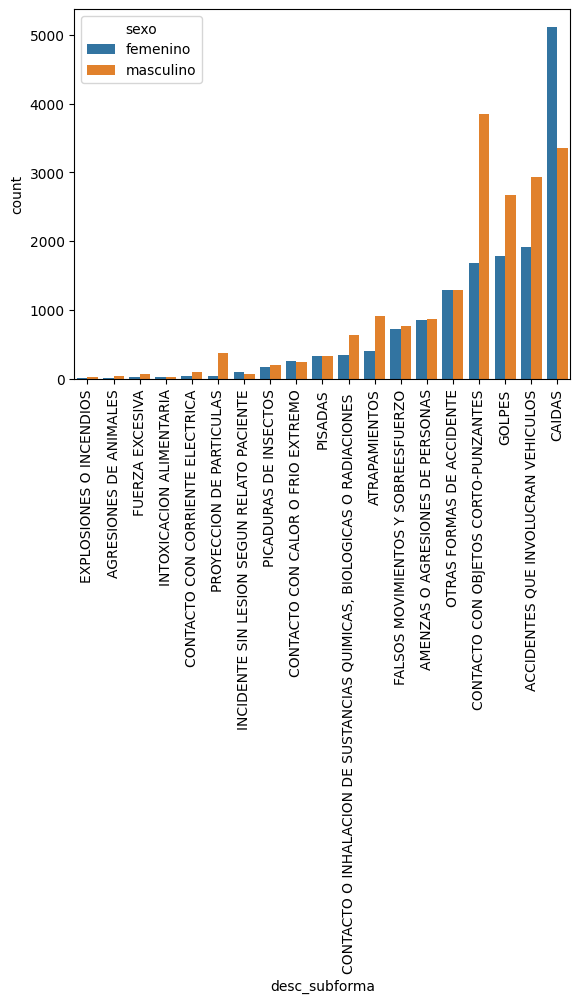

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['month']==3].groupby(['desc_subforma','sexo']).size().reset_index(name='count').sort_values('count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_2, hue='sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### ¿Hay relacion entre los dias de la semana y el tipo de acciente?

In [ ]:
edades = {}

# Accidentes mas frecuentes entre hombres y mujeres

## Mujeres

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\2682550286.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(1, 0, 'AGRESIONES DE ANIMALES'),
 Text(2, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(3, 0, 'ATRAPAMIENTOS'),
 Text(4, 0, 'CAIDAS'),
 Text(5, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(6, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(7, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(8, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(9, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(10, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(11, 0, 'FUERZA EXCESIVA'),
 Text(12, 0, 'GOLPES'),
 Text(13, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(14, 0, 'INTOXICACION ALIMENTARIA'),
 Text(15, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(16, 0, 'PICADURAS DE INSECTOS'),
 Text(17, 0, 'PISADAS'),
 Text(18, 0, 'PROYECCION DE PARTICULAS')]

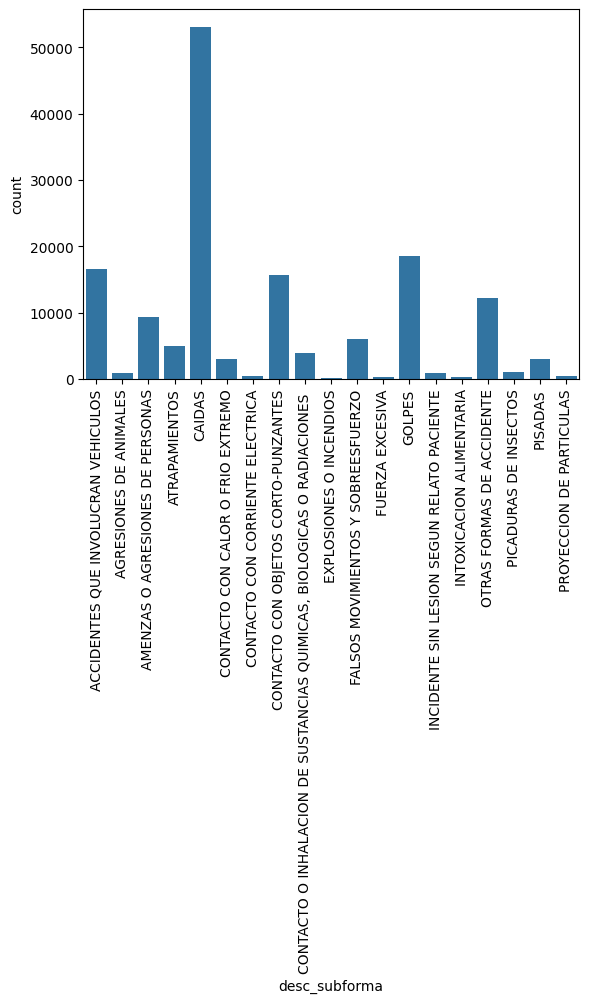

In [ ]:
graf_3 = df_mecanismos[df_mecanismos['sexo']=='femenino'].groupby(['desc_subforma']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


## Hombres

C:\Users\DELL\AppData\Local\Temp\ipykernel_16152\1735404808.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(1, 0, 'AGRESIONES DE ANIMALES'),
 Text(2, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(3, 0, 'ATRAPAMIENTOS'),
 Text(4, 0, 'CAIDAS'),
 Text(5, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(6, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(7, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(8, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(9, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(10, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(11, 0, 'FUERZA EXCESIVA'),
 Text(12, 0, 'GOLPES'),
 Text(13, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(14, 0, 'INTOXICACION ALIMENTARIA'),
 Text(15, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(16, 0, 'PICADURAS DE INSECTOS'),
 Text(17, 0, 'PISADAS'),
 Text(18, 0, 'PROYECCION DE PARTICULAS')]

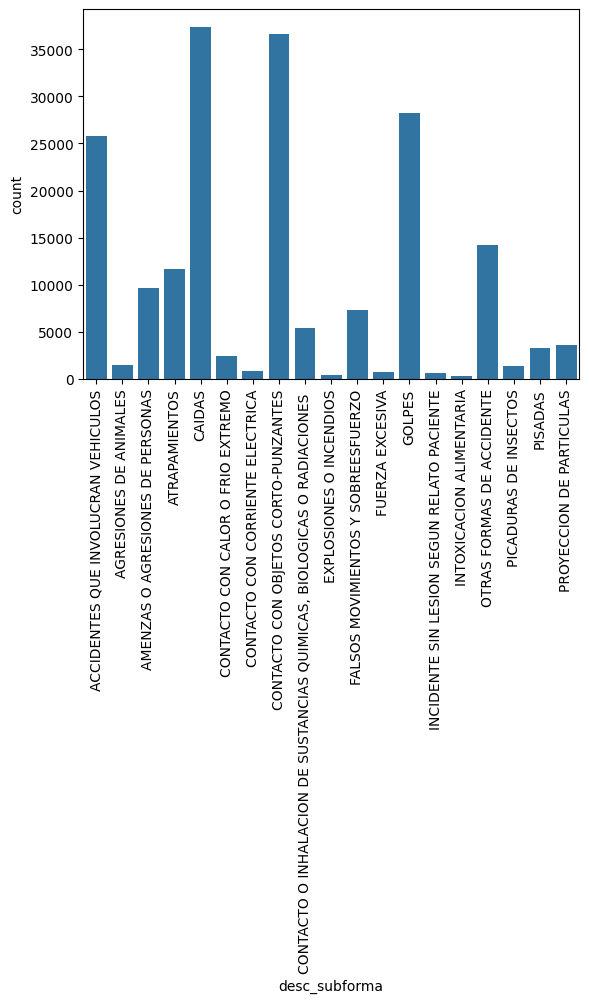

In [ ]:
graf_4 = df_mecanismos[df_mecanismos['sexo']=='masculino'].groupby(['desc_subforma']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Grupos etarios